# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель исследования:

1. Определить рыночную стоимость объектов недвижимости;
2. Установить параметры, которые позволят отслеживать аномалии и мошенническую деятельность;
3. Установить, какие факторы влияют на ценообразование стоимости квартир.

Ход исследования:

Данные о недвижимости я получу из файла `'/datasets/real_estate_data.csv'` и изучу общую информацию о них. 

Я проверю данные на ошибки и аномалии, поищу возможность их исправления, которые не приведут к искажению конечного результата, далее оценю какие факторы влияют на ценообразование стоимости квартир, создам необходимые визуализации данных для качественного исследовательского анализа. 

Таким образом, мое исследование пройдет в несколько этапов:

1. Обзор данных;
2. Предобработка данных;
3. Расчеты и добавление результатов в таблицу;
4. Проведение анализа данных для Санкт-Петербурга и Ленинградской области;
5. Установление факторов, влияющих на ценообразование стоимости квартир;
6. Написание общего вывода.






`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах (м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — общая площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv',  sep='\t')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

    По данной информации можно увидеть некорректные наименования столбцов, очень много пропусков и неверные типы данных.

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
for col in data.columns:
    print(f'{col}: {data[col].isna().sum() / data.shape[0] * 100:.2f}%')

total_images: 0.00%
last_price: 0.00%
total_area: 0.00%
first_day_exposition: 0.00%
rooms: 0.00%
ceiling_height: 38.80%
floors_total: 0.36%
living_area: 8.03%
floor: 0.00%
is_apartment: 88.29%
studio: 0.00%
open_plan: 0.00%
kitchen_area: 9.61%
balcony: 48.61%
locality_name: 0.21%
airports_nearest: 23.38%
cityCenters_nearest: 23.29%
parks_around3000: 23.28%
parks_nearest: 65.91%
ponds_around3000: 23.28%
ponds_nearest: 61.56%
days_exposition: 13.42%


<AxesSubplot:>

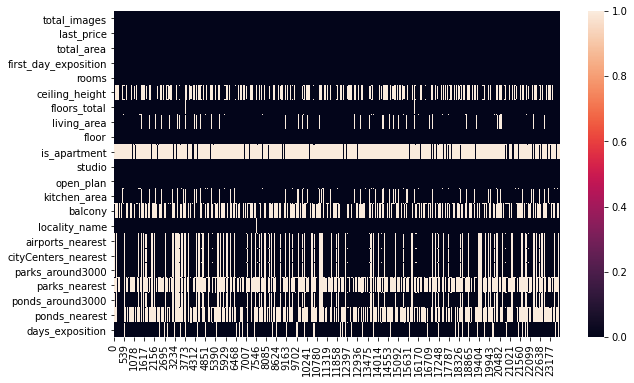

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isna().transpose())

    В данном датасете (в 14 позициях) очень много пропусков, из-за которых может зависеть результат. Один из них незначительный - days_exposition, что говорит о том, что объявление еще не снято с публикации. 

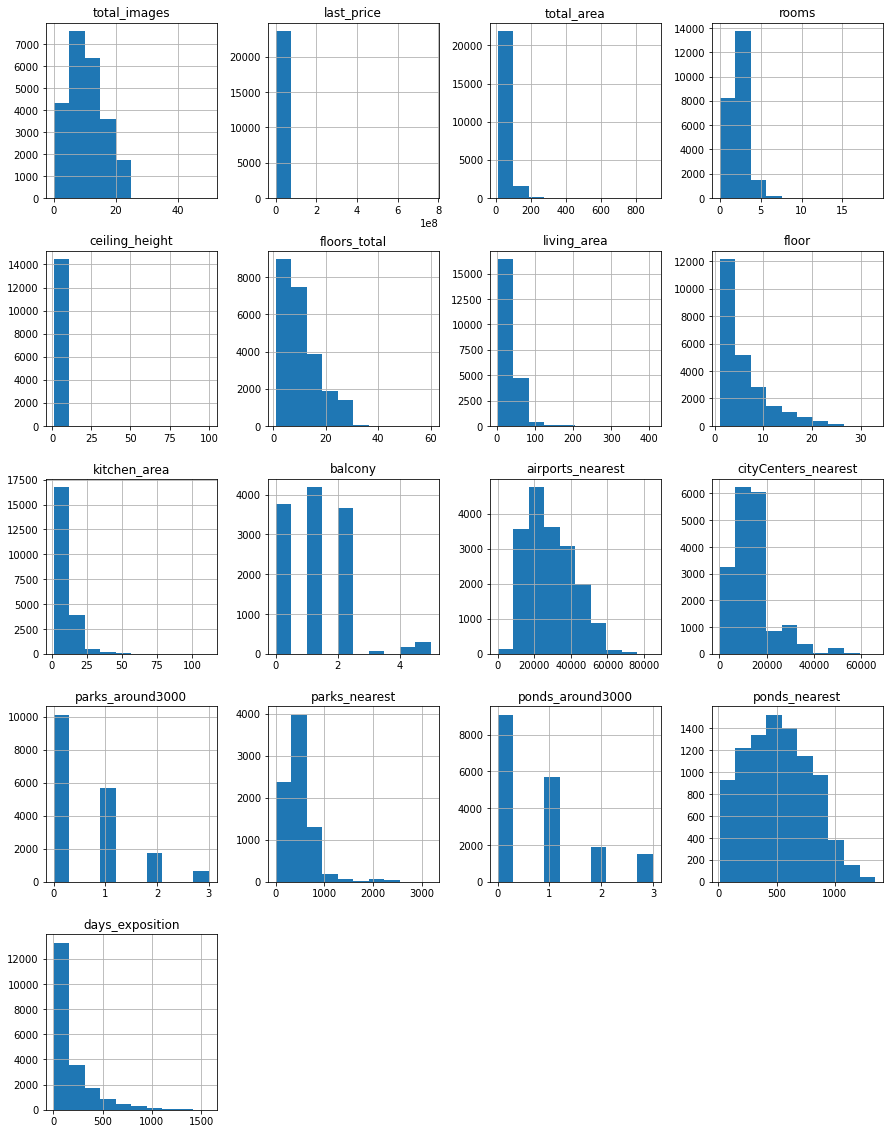

In [7]:
data.hist(figsize=(15, 20))
plt.show();

In [8]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


    Помимо пропущенных значений, необходимо еще проверить их на адекватность. Например, на максимальные и минимальные значения. Сразу можно сказать, что есть аномалии, например, в максимальной площади квартиры, максимальной высоте, жилой площади и т.д. 

### Предобработка данных

    Для начала, приведем в порядок наименования колонок.

In [9]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest', 'parks_around3000' : 'parks_around_3km', 
                      'ponds_around3000' : 'ponds_around_3km'}, inplace = True )

    Переведем колонку с датой публикации в формат DATETIME для того, чтобы в дальнейшем можно было работать с ней.

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#### Заполнение пропусков

***ceiling_height***

    Итак, по узаконенным строительным нормам и правилам (СНиП) высота потолков в жилых помещениях должна быть не меньше 2.5 метров, поэтому данные пропуски заполним этим значением. 

    Возможно, данный пропуск возник из-за человеческого фактора.

In [11]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.5)

***living_area***

    Далее, рассмотрим пропуски в жилой площади. Данный пропуск возник, возможно, из-за человеческого фактора, а возможно из-за ошибки при выгрузке.

    Данный пропуск заполним медианой, сгруппировав по общему числу комнат.

In [12]:
rooms_group = data.groupby('rooms')['living_area'].agg('median').to_dict()
data_area = data[data['living_area'].isna()]

for index in data_area['rooms'].unique():
    data.loc[(data['living_area'].isna()) & (data['rooms'] == index), 'living_area'] = rooms_group[index]

***is_apartment***

    Наблюдается очень много пропусков в данной колонке, не заполнено около 88 % от всего датасета. Это связано с тем, что человек при заполнении данных просто не указал, что это НЕ апартаменты, т.е. решил пропустить данную информацию. А, возможно, что при заполнении анкеты там было только "да" в выпадающем списке или же данные просто не выгрузились. 
    
    Данный пропуск заполним False.

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False)

***kitchen_area***

    Далее, рассмотрим пропуски в площади кухни. Данный пропуск возник или из-за человеческого фактора или же произошла техническая ошибка при выгрузке. 

    Данный пропуск заполним медианой, сгруппировав по общему числу комнат.

In [14]:
kitchen_group = data.groupby('rooms')['kitchen_area'].agg('median').to_dict()
data_area_kitchen = data[data['kitchen_area'].isna()]

for index in data_area_kitchen['rooms'].unique():
    data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == index), 'kitchen_area'] = kitchen_group[index]

In [15]:
data['kitchen_area'].isna().sum()

197

    Осталось всего 197 пропусков. Важно понять, почему. Ниже можно увидеть, что площадь кухни не стоит там, где общее количество комнат равны 0. Это, скорее всего, квартира-студия, а обычно кухня в такой квартире стоит прямо в комнате. Склоняюсь к тому, чтобы поставить там 0... или все же сделать равной жилой площади?))))

In [16]:
data[data['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,2.5,24.0,15.50,2,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,2.5,14.0,17.00,1,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,2.5,17.0,24.75,4,False,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,2.5,26.0,24.30,19,False,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,2.5,10.0,18.00,7,False,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,2.5,25.0,18.00,16,False,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,2.5,24.0,18.00,4,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,2.5,19.0,18.00,8,False,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,2.5,9.0,18.00,8,False,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [17]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)

***balcony***

    Наблюдается почти 50% пропусков в данной колонке. Возможно, продавец не указал число балконов, потому что их нет, поэтому логичнее данный пропуск заполнить 0. 

In [18]:
data['balcony'] = data['balcony'].fillna(0)

***locality_name***

    В данной колонке очень мало пропусков, скорее всего возникших из-за того, что продавец не поставил метку расположения квартиры. Но с ними так же можно поработать, например, взять расстояние до центра города и по нему определить локацию.   

In [19]:
data_local = data[(data['locality_name'].isna()) & (data['city_centers_nearest'] > 0)]
data_local_sort = sorted(data_local['city_centers_nearest'].unique())

In [20]:
for index in data_local_sort:
    print(f"{index} - {data[data['city_centers_nearest'] <= index]['locality_name'].unique()}")

1322.0 - ['Санкт-Петербург' nan]
1780.0 - ['Санкт-Петербург' nan]
3039.0 - ['Санкт-Петербург' nan]
3312.0 - ['Санкт-Петербург' nan]
3801.0 - ['Санкт-Петербург' nan]
3902.0 - ['Санкт-Петербург' nan]
4065.0 - ['Санкт-Петербург' nan]
4069.0 - ['Санкт-Петербург' nan]
4258.0 - ['Санкт-Петербург' nan]
4383.0 - ['Санкт-Петербург' nan]
4474.0 - ['Санкт-Петербург' nan]
4604.0 - ['Санкт-Петербург' nan]
4627.0 - ['Санкт-Петербург' nan]
4805.0 - ['Санкт-Петербург' nan]
5382.0 - ['Санкт-Петербург' nan]
8127.0 - ['Санкт-Петербург' nan]
8429.0 - ['Санкт-Петербург' nan]
8582.0 - ['Санкт-Петербург' nan]
8619.0 - ['Санкт-Петербург' nan]
8943.0 - ['Санкт-Петербург' nan]
9497.0 - ['Санкт-Петербург' nan]
9538.0 - ['Санкт-Петербург' nan]
9633.0 - ['Санкт-Петербург' nan]
10976.0 - ['Санкт-Петербург' nan]
12332.0 - ['Санкт-Петербург' nan]
16788.0 - ['Санкт-Петербург' nan]
17369.0 - ['Санкт-Петербург' nan 'посёлок Шушары']
23659.0 - ['Санкт-Петербург' 'посёлок Шушары' 'посёлок Парголово' 'посёлок Стрельна'
 na

    Видно, что до 17 км. наблюдается только "Санкт-Петербург". Поэтому до данного значения можно проставить локацию - Санкт-Петербург.

In [21]:
for index in range(len(data_local_sort)):
    if data_local_sort[index] >= 17369:
        break
    data.loc[(data['locality_name'].isna()) & (data['city_centers_nearest'] <= data_local_sort[index]), 'locality_name'] = 'Санкт-Петербург'

In [22]:
data['locality_name'].isna().sum()

20

    Так как пропущенных значений осталось очень мало, их можно удалить. 

In [23]:
data.dropna(subset=['locality_name'], inplace=True)

***airports_nearest, city_centers_nearest, parks_around_3km, parks_nearest, ponds_around_3km, ponds_nearest***

    Наблюдается много пропусков с расстояниями до какого-либо объекта. Скорее всего, произошла техническая ошибка, что карты не смогли идентифицировать расстояние до данных объектов, хотя может быть такое, что близких этих объектов нет, поэтому и стоит пропуск. Можно их заполнить медианой. 
    
    Но в лучшем случае, конечно, поработать с Картами и находить ближайший объект, т.к. это очень влияет на цену. Многие хотят жить в экологичном районе))

In [24]:
for index in data.columns[-7:-1]:
    data.loc[data[index].isna(), index] = data[index].sort_values(ascending=True).median()

***floors_total***

    Далее, посмотрим на кол-во этажей в доме. Пропусков в данной колонке составляет всего 86. Данный пропуск, возможно, так же был не заполнен из-за человеческого фактора или в базе Я.Недвижимость не было данных о данном доме.

    Т.к. данных пропусков очень мало, можно было их оставить, но все-таки можно сгруппировать по расстоянию до центра и локации, далее посчитать медиану.

In [25]:
data['floors_total'] = data['floors_total'].fillna(data.groupby('city_centers_nearest')['floors_total'].transform('median'))
data['floors_total'] = data['floors_total'].fillna(data.groupby('locality_name')['floors_total'].transform('median'))

In [26]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest       0
parks_around_3km           0
parks_nearest              0
ponds_around_3km           0
ponds_nearest              0
days_exposition         3180
dtype: int64

    Как было сказано выше, последний пропуск не будем заполнять, т.к. объявления на момент выгрузки данных не снято. 

#### Неявные дубликаты

In [27]:
data.duplicated().sum()

0

    Дубликатов в данных нет, но необходимо обработать неявные дубликаты в таблице locality_name. Будем заменять все "ё" на "е" и "городской поселок" поменяем на "поселок городского типа"

In [28]:
data['locality_name'] = data['locality_name'].str.lower().str.replace('ё', 'е').str.replace("городской поселок", "поселок городского типа")

In [29]:
max_rows = pd.get_option("display.max_rows")
pd.set_option("display.max_rows", None)

In [30]:
data['locality_name'].value_counts()

санкт-петербург                                            15750
поселок мурино                                               556
поселок шушары                                               440
всеволожск                                                   398
пушкин                                                       369
колпино                                                      338
поселок парголово                                            327
гатчина                                                      307
деревня кудрово                                              299
выборг                                                       237
петергоф                                                     201
сестрорецк                                                   183
красное село                                                 178
кудрово                                                      173
деревня новое девяткино                                      144
сертолово                

    Далее, для дальнейшего анализа, можно сгруппировать названия по типу населенного пункта, затем создать дополнительный признак, по которым легче будет ориентироваться (т.е. 0 - это город, 1 - деревня и т.д.)

In [31]:
settlements = {"деревня": set(), "село": set(), "поселок": set(), "поселок городского типа": set()}

In [32]:
for name in settlements:
    settlements[name] = set(data['locality_name'][data['locality_name'].str.contains(name)].str.replace(name, '').str.strip().unique())

In [33]:
settlements["село"] = set(el for el in settlements["село"] if not "пок " in el)
settlements["поселок"] = set(el for el in settlements["поселок"] if not "городского типа" in el)

In [34]:
settlements["деревня"] = settlements["деревня"] - settlements["село"] - settlements["поселок"] - settlements["поселок городского типа"]
settlements["село"] = settlements["село"] - settlements["поселок"] - settlements["поселок городского типа"]
settlements["поселок"] = settlements["поселок"] - settlements["поселок городского типа"]

In [35]:
settlements

{'деревня': {'агалатово',
  'аро',
  'батово',
  'бегуницы',
  'белогорка',
  'большая вруда',
  'большая пустомержа',
  'большие колпаны',
  'большое рейзино',
  'большой сабск',
  'бор',
  'борисова грива',
  'ваганово',
  'вартемяги',
  'вахнова кара',
  'выскатка',
  'глинка',
  'горбунки',
  'гостилицы',
  'заклинье',
  'заневка',
  'извара',
  'иссад',
  'кальтино',
  'камышовка',
  'каськово',
  'келози',
  'кипень',
  'кисельня',
  'колтуши',
  'коркино',
  'котлы',
  'кривко',
  'кудрово',
  'кузьмолово',
  'курковицы',
  'куровицы',
  'куттузи',
  'лаврики',
  'лаголово',
  'лампово',
  'лесколово',
  'лопухинка',
  'лупполово',
  'малая романовка',
  'малое верево',
  'малое карлино',
  'малые колпаны',
  'мануйлово',
  'меньково',
  'мины',
  'мистолово',
  'ненимяки',
  'нижние осельки',
  'нижняя',
  'низино',
  'новое девяткино',
  'новолисино',
  'нурма',
  'оржицы',
  'парицы',
  'пельгора',
  'пеники',
  'пижма',
  'пикколово',
  'пудомяги',
  'пустынка',
  'пчева',
 

    Добавим данный признак в таблицу

In [36]:
data["settlement_type"] = 0

In [37]:
settlements_types = {"город": 0, "деревня": 1, "село": 2, "поселок": 3, "поселок городского типа": 4}

In [38]:
for settlement, places in settlements.items():
    for place in places:
        condition = data["locality_name"].str.contains(place)
        data.loc[condition, "settlement_type"] = settlements_types[settlement]
        data.loc[condition, "locality_name"] = f"{settlement} {place}" 

In [39]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,settlement_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0
1,7,3350000.0,40.4,2018-12-04,1,2.50,11.0,18.6,1,False,...,2.0,поселок шушары,12817.0,18603.0,0.0,455.0,0.0,503.0,81.0,3
2,10,5196000.0,56.0,2015-08-20,2,2.50,5.0,34.3,4,False,...,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0
3,0,64900000.0,159.0,2015-07-24,3,2.50,14.0,45.0,9,False,...,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0


#### Обработка выбросов, аномалии

In [40]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,settlement_type
count,23679.000000,2.367900e+04,23679.000000,23679.000000,23679.000000,23679.000000,23679.000000,23679.000000,23679.000000,23679.000000,23679.000000,23679.000000,23679.000000,23679.000000,23679.000000,23679.000000,20499.000000,23679.000000
mean,9.860425,6.542966e+06,60.342856,2.070738,2.666256,10.677942,34.323689,5.891803,10.374472,0.591326,28315.093712,13931.789772,0.469446,467.216099,0.823683,508.815913,180.898288,0.453989
std,5.681051,1.089114e+07,35.656865,1.078640,0.995766,6.596024,21.706586,4.882818,5.715761,0.959529,11091.667776,7552.653969,0.748725,200.663689,0.827837,172.385499,219.781544,1.051379
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.400000,2.000000,7.200000,0.000000,21178.500000,10914.500000,0.000000,455.000000,0.000000,503.000000,45.000000,0.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.500000,9.000000,30.300000,4.000000,9.040000,0.000000,26737.000000,13094.000000,0.000000,455.000000,1.000000,503.000000,95.000000,0.000000
75%,14.000000,6.800000e+06,69.800000,3.000000,2.700000,16.000000,42.700000,8.000000,11.500000,1.000000,34355.000000,15245.000000,1.000000,455.000000,1.000000,503.000000,232.000000,0.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,4.000000


    Сначала сравним общую площадь квартиры с жилой площадью, нет ли такого, что общая меньше, чем жилая, далее проверим, может ли быть так, что количество этажей в доме меньше этажа, где находится данная квартир и может ли быть, что кухня больше, чем общая площадь квартиры. А если есть, то удалим. 

In [41]:
data.drop(data[data['total_area'] < data['living_area']].index, inplace=True)
data.drop(data[data['floors_total'] < data['floor']].index, inplace=True)
data.drop(data[data['total_area'] < data['kitchen_area']].index, inplace=True)

    Рассмотрим выбросы по каждому столбцу.

(0.0, 15000000.0)

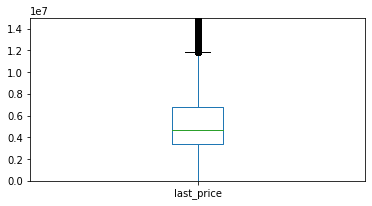

In [42]:
data['last_price'].plot(kind='box', figsize=(6,3))
plt.ylim(0, 15000000)

    Удалим строки, где квартира стоит меньше 12 т.р. и больше 500000000 р.

In [43]:
data = data.drop(data['last_price'].idxmin()).reset_index(drop=True)
data = data.drop(data.query('last_price > 500000000').index).reset_index(drop=True)

(0.0, 900.0)

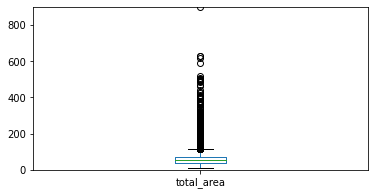

In [44]:
data['total_area'].plot(kind='box', figsize=(6,3))
plt.ylim(0, 900)

    На рынке недвижимости Санкт-Петербурга самая большая квартира имеет площадь 631 квадратный метр, а самая маленькая – 12 квадратных метров, это будет очень мешать при анализе данных, поэтому удалим строки, где площадь больше 500 кв. метров.

In [45]:
data = data.drop(data.query('total_area > 500').index).reset_index(drop=True)

(0.0, 20.0)

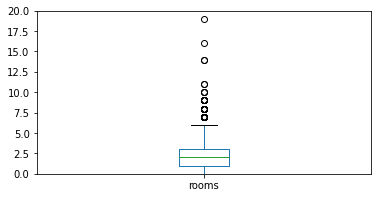

In [46]:
data['rooms'].plot(kind='box', figsize=(6,3))
plt.ylim(0, 20)

    Удалим строки, где комнат больше, чем 6. 

In [47]:
data = data.drop(data.query('rooms > 6').index).reset_index(drop=True)

(0.0, 4.0)

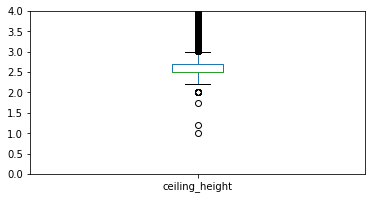

In [48]:
data['ceiling_height'].plot(kind='box', figsize=(6,3))
plt.ylim(0, 4)

    Сегодня минимальной нормой в России считается высота потолка 2,5 метра. В новостройках обычно это значение находится в пределах 2,5-2,7 метра. 

In [49]:
data = data.drop(data.query('ceiling_height > 3').index).reset_index(drop=True)
data = data.drop(data.query('ceiling_height < 2.5').index).reset_index(drop=True)

(0.0, 60.0)

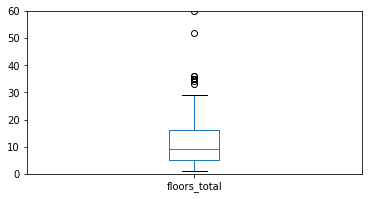

In [50]:
data['floors_total'].plot(kind='box', figsize=(6,3))
plt.ylim(0, 60)

    Самое высокое жилое здание в Санкт-Петербурге составляет 37 этажей, поэтому выше удалим. 

In [51]:
data = data.drop(data.query('floors_total > 37').index).reset_index(drop=True)

(0.0, 450.0)

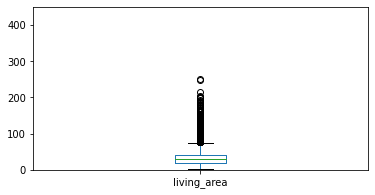

In [52]:
data['living_area'].plot(kind='box', figsize=(6,3))
plt.ylim(0, 450)

<AxesSubplot:>

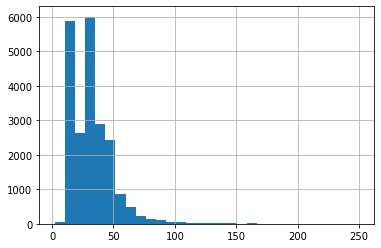

In [53]:
data['living_area'].hist(bins=30)

    Квартиры с очень высокой жилой площадью (более 100 кв. метров) и меньшей (10 кв. метров) удалим, т.к. они являются выбросами. 

In [54]:
data = data.drop(data.query('living_area > 100').index).reset_index(drop=True)
data = data.drop(data.query('living_area < 10').index).reset_index(drop=True)

(0.0, 50.0)

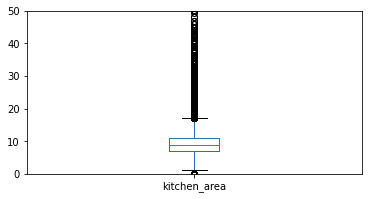

In [55]:
data['kitchen_area'].plot(kind='box', figsize=(6,3))
plt.ylim(0, 50)

    Кухня с 20 кв. метрами - это очень здорово, но все же выходит за наши рамки, можно удалить. 

In [56]:
data = data.drop(data.query('kitchen_area > 20').index).reset_index(drop=True)

    Так же, удалим те строки, где разница между общей площадью, жилой площадью и кухней выходит в "минус". 

In [57]:
data = data.drop(data[(data['total_area'] - data['living_area'] - data['kitchen_area']) < 0].index).reset_index(drop=True)

    Так же удалим строку, где расстояние от аэропорта до дома равна 0. 

In [58]:
data = data.drop(data.query('airports_nearest == 0').index).reset_index(drop=True)

    Переведем колонки 'ceiling_height', 'floors_total', 'last_price' и 'balcony' в целочисленный тип (int64), сделаем их более корректными. 

In [59]:
data.ceiling_height = data.ceiling_height.astype(np.int64)
data.last_price = data.last_price.astype(np.int64)
data.floors_total = data.floors_total.astype(np.int64)
data.balcony = data.balcony.astype(np.int64)

In [60]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,settlement_type
count,20887.000000,2.088700e+04,20887.000000,20887.000000,20887.000000,20887.000000,20887.000000,20887.000000,20887.000000,20887.000000,20887.000000,20887.000000,20887.000000,20887.000000,20887.000000,20887.000000,18293.000000,20887.000000
mean,9.760425,5.287907e+06,54.721745,1.953081,2.045770,10.961411,31.121248,5.988079,9.326104,0.613157,28502.831953,14569.797099,0.411069,469.213195,0.778523,513.669842,174.162193,0.489922
std,5.586604,4.039406e+06,22.103990,0.921043,0.208991,6.604216,14.195177,4.924577,3.139315,0.962335,11344.662193,7327.031235,0.695141,194.547127,0.783137,166.106295,213.592307,1.086590
min,0.000000,4.300000e+05,14.000000,0.000000,2.000000,1.000000,10.000000,1.000000,0.000000,0.000000,6450.000000,318.000000,0.000000,1.000000,0.000000,13.000000,1.000000,0.000000
25%,6.000000,3.342500e+06,39.100000,1.000000,2.000000,5.000000,18.000000,2.000000,7.000000,0.000000,20726.500000,11827.000000,0.000000,455.000000,0.000000,503.000000,44.000000,0.000000
50%,9.000000,4.440000e+06,50.000000,2.000000,2.000000,9.000000,29.900000,4.000000,9.000000,0.000000,26737.000000,13094.000000,0.000000,455.000000,1.000000,503.000000,92.000000,0.000000
75%,14.000000,6.050000e+06,64.500000,3.000000,2.000000,16.000000,40.000000,8.000000,11.000000,1.000000,35134.000000,15561.000000,1.000000,455.000000,1.000000,503.000000,219.000000,0.000000
max,42.000000,1.400000e+08,494.100000,6.000000,3.000000,36.000000,100.000000,33.000000,20.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,4.000000


    Вывод: На данном этапе мы произвели предобработку данных для исследовательского анализа. 
    
    Для удобства работы с данными мы:
    
    1. Изменили названия столбцов для удобства восприятия информации;
    2. Изменили некорректные типы данных;
    3. Убрали неявные дубликаты в названии населенных пунктов;
    4. Обработали пропуски в данных с помощью медианы и дополнительных фичей;
    5. Строки, где были аномальные значения и выбросы, - удалили. 
    
    Данные готовы для дальнейшего исследовательского анализа.

### Посчитайте и добавьте в таблицу новые столбцы

    Добавим новые столбцы в таблицу и приведем их к типу данных, для работы с ними. 

In [61]:
data['price_square_meter'] = (data['last_price'] / data['total_area']).astype('int')
data['weekday_publication'] = data['first_day_exposition'].dt.weekday
data['month_publication'] = data['first_day_exposition'].dt.month
data['year_publication'] = data['first_day_exposition'].dt.year

    Добавим тип этажа в доме

In [62]:
def types_floor(row):
    if row['floor'] == row['floors_total']:
        return 'Последний'
    elif row['floor'] == 0 or row['floor'] == 1:
        return 'Первый'
    return 'Другой'

In [63]:
data['type_floor'] = data.apply(types_floor, axis=1)

    Посчитаем и добавим в таблицу: расстояние в км до центра города и приведем к нужному типу данных для расстояния. 

In [64]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).astype('int')

### Проведите исследовательский анализ данных

    Пройдемся по каждому столбцу и проанализируем.

count    20887.000000
mean        54.721745
std         22.103990
min         14.000000
25%         39.100000
50%         50.000000
75%         64.500000
max        494.100000
Name: total_area, dtype: float64

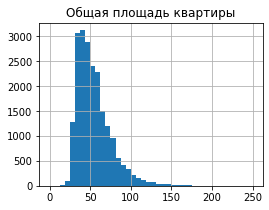

In [65]:
data['total_area'].hist(bins=40, grid=True, range=(0,250), figsize=(4,3))
plt.title('Общая площадь квартиры')
data['total_area'].describe()

    Минимальная площадь квартиры составляет всего 14 кв. метров, хотя стандартный квадратный метраж должен составлят не менее 18 кв. метров на человека (в лучшем случает 33 кв.м.). Большинство квартир в объявлении варьируются от 45 до 50 кв. метров. Далее, с нарастанием общей площади график количество объявлении начинает уменьшаться. Нельзя говорить о том, что это выброс, ведь проанализировав различные сайты с рынком недвижимости, можно действительно встретить квартиры, превышающие 100 кв. метров.

count    20887.000000
mean        31.121248
std         14.195177
min         10.000000
25%         18.000000
50%         29.900000
75%         40.000000
max        100.000000
Name: living_area, dtype: float64

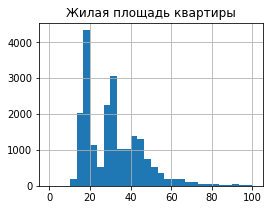

In [66]:
data['living_area'].hist(bins=30, grid=True, range=(0,100), figsize=(4,3))
plt.title('Жилая площадь квартиры')
data['living_area'].describe()

    На данном графике наблюдается, что большинство квартир с жилой площадью составляет 17 - 20 кв.метров, что составляет около 4600 объявлений, на втором месте около 30 кв.метров составляют 3100 объявлений. После 45 кв.м. с увеличением количества жилой площади, количество объявлении начинает уменьшаться в связи с тем, что "больших" квартир у нас меньше, чем квартир поменьше.

count    20887.000000
mean         9.326104
std          3.139315
min          0.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         20.000000
Name: kitchen_area, dtype: float64

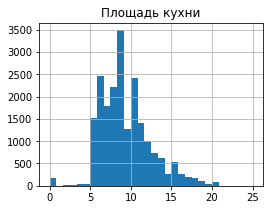

In [67]:
data['kitchen_area'].hist(bins=30, grid=True, range=(0,25), figsize=(4,3))
plt.title('Площадь кухни')
data['kitchen_area'].describe()

    Самая минимальная площадь кухни составляет 0 кв.м. Это связано с тем, что данные квартиры являются студиями. На графике можно увидеть, что большинство объявлении с кухней около 8-10 кв.метров., что в пределах разумного. 

count    2.088700e+04
mean     5.287907e+06
std      4.039406e+06
min      4.300000e+05
25%      3.342500e+06
50%      4.440000e+06
75%      6.050000e+06
max      1.400000e+08
Name: last_price, dtype: float64

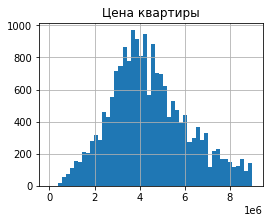

In [68]:
data['last_price'].hist(bins=50, grid=True, range=(0,9000000), figsize=(4,3))
plt.title('Цена квартиры')
data['last_price'].describe()

    Больше всего квартир с ценниками от 3.8 до 4.5 млн. рублей. Пик объявлении находится на позиции около 3.8 млн. рублей, минимальная стоимость составляет 430 тыс. руб. 

count    20887.000000
mean         1.953081
std          0.921043
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

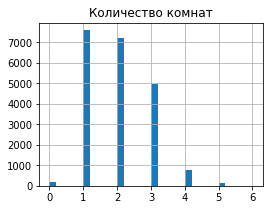

In [69]:
data['rooms'].hist(bins=30, grid=True, range=(0,6), figsize=(4,3))
plt.title('Количество комнат')
data['rooms'].describe()

    Максимальное количество объявлении с 1, 2 и 3 комнатами. Минимальное количество объявлении со студиями, 4, 5 и 6 комнатами.

count    20887.000000
mean         2.045770
std          0.208991
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: ceiling_height, dtype: float64

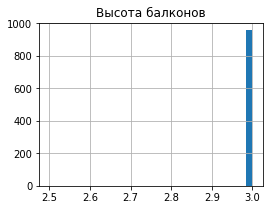

In [70]:
data['ceiling_height'].hist(bins=30, grid=True, range=(2.5,3), figsize=(4,3))
plt.title('Высота балконов')
data['ceiling_height'].describe()

    Большинство объявлении, где потолки около 2.5 метров. Вспоминая пропущенные значения, в данной колонке было их 9195. Если их не засчитывать, то 2.5 метров все равно будет большинство. Но в любом случае, высота потолков у нас "в пределах разумного" и по нормам СНиП. 
    
    Стоит внимательно отнестись к данному пункту, считаю правильным добавить в Я.Недвижимость серию дома, т.к. в открытом доступе есть документы, где записаны параметры домов.

count    20887.000000
mean         5.988079
std          4.924577
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

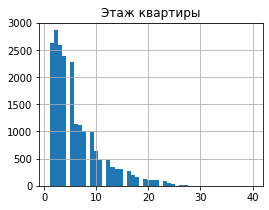

In [71]:
data['floor'].hist(bins=50, grid=True, range=(1,40), figsize=(4,3))
plt.title('Этаж квартиры')
data['floor'].describe()

    Большинство квартир в объявлении находится с 1 по 5 этаж, после 5 этажа становится все меньше. 

count      20887
unique         3
top       Другой
freq       15428
Name: type_floor, dtype: object

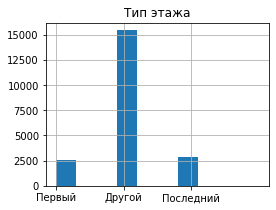

In [72]:
data['type_floor'].hist(bins=10, grid=True, range=(0,3), figsize=(4,3))
plt.title('Тип этажа')
data['type_floor'].describe()

    Меньше всего объявлении приходится, где расположение квартир находится на первом и последнем. 

count    20887.000000
mean        10.961411
std          6.604216
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

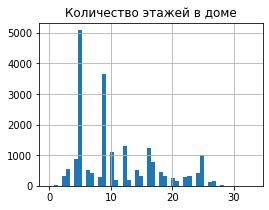

In [73]:
data['floors_total'].hist(bins=50, grid=True, range=(0,33), figsize=(4,3))
plt.title('Количество этажей в доме')
data['floors_total'].describe()

    Большинство объявлении, где общая этажность дома составляет 5 и 9 этажей. Минимальная этажность дома составляет 1 этаж, а максимальная - 36 этажей.

count    20887.000000
mean     14569.797099
std       7327.031235
min        318.000000
25%      11827.000000
50%      13094.000000
75%      15561.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

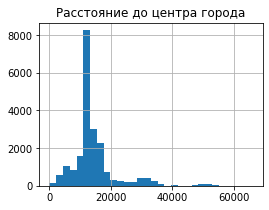

In [74]:
data['city_centers_nearest'].hist(bins=30, grid=True, range=(0,66000), figsize=(4,3))
plt.title('Расстояние до центра города')
data['city_centers_nearest'].describe()

    Расстояние до центра города составляет от 318 метров до 65 км. Большинство квартир в объявлении находятся в 10 км от центра города. Примерно на таком расстоянии расположены спальные районы. 

count    20887.000000
mean     28502.831953
std      11344.662193
min       6450.000000
25%      20726.500000
50%      26737.000000
75%      35134.000000
max      84869.000000
Name: airports_nearest, dtype: float64

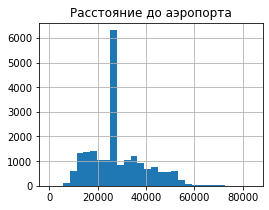

In [75]:
data['airports_nearest'].hist(bins=30, grid=True, range=(0,84000), figsize=(4,3))
plt.title('Расстояние до аэропорта')
data['airports_nearest'].describe()

    Больше всего квартир находятся примерно в 26 км. от аэропорта.

count    20887.000000
mean       469.213195
std        194.547127
min          1.000000
25%        455.000000
50%        455.000000
75%        455.000000
max       3190.000000
Name: parks_nearest, dtype: float64

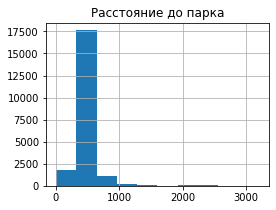

In [76]:
data['parks_nearest'].hist(bins=10, grid=True, range=(0,3200), figsize=(4,3))
plt.title('Расстояние до парка')
data['parks_nearest'].describe()

    Большая часть квартир расположена в 500 метрах от парка, что очень даже хорошо. 

Text(0.5, 1.0, 'Тип населенного пункта')

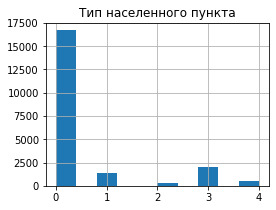

In [77]:
data['settlement_type'].hist(bins=10, grid=True, range=(0,4), figsize=(4,3))
plt.title('Тип населенного пункта')

    Большинство квартир в объявлении находятся в Санкт-Петербурге, меньше всего в селах.

count    20887.000000
mean         2.581845
std          1.793140
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_publication, dtype: float64

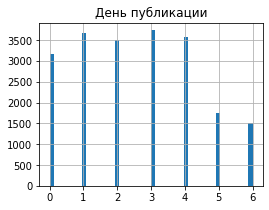

In [78]:
data['weekday_publication'].hist(bins=50, grid=True, range=(0,6), figsize=(4,3))
plt.title('День публикации')
data['weekday_publication'].describe()

    Больше всего объявлении выставлялись с понедельника по пятницу, то есть в будние дни.

count    20887.000000
mean         6.409872
std          3.491595
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_publication, dtype: float64

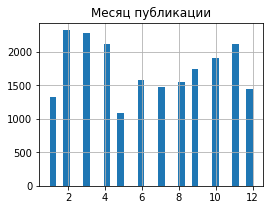

In [79]:
data['month_publication'].hist(bins=30, grid=True, range=(1,12), figsize=(4,3))
plt.title('Месяц публикации')
data['month_publication'].describe()

    Максимальное количество объявлении наблюдается в феврале и в марте, меньше всего в мае. 

    Далее, посмотрим как быстро продавались квартиры. Для начала возьмем те значения, где нет пропусков.

In [80]:
selected_rows_days_exposition = data[~data['days_exposition'].isnull()]

count    18293.000000
mean       174.162193
std        213.592307
min          1.000000
25%         44.000000
50%         92.000000
75%        219.000000
max       1580.000000
Name: days_exposition, dtype: float64

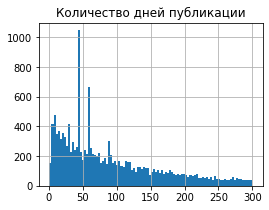

In [81]:
selected_rows_days_exposition['days_exposition'].hist(bins=100, grid=True, range=(1,300), figsize=(4,3))
plt.title('Количество дней публикации')
selected_rows_days_exposition['days_exposition'].describe()

    Среднее количество дней до снятия публикации составляет 174 дня, а медианное значение составило 92. Большее количество объявлении, снятых с публикации составляет 45 дней, долгая продажа длится от 220 дней. 
    
    Можно посмотреть, какие квартиры были наиболее продаваемые. 

In [82]:
selected_rows_days_exposition[selected_rows_days_exposition['days_exposition'] <= 45].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,settlement_type,price_square_meter,weekday_publication,month_publication,year_publication,city_centers_nearest_km
count,4676.000000,4.676000e+03,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,...,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000
mean,9.523524,4.927940e+06,50.836223,1.807742,2.033148,11.441617,28.742185,6.254491,8.997102,0.639435,...,464.626176,0.729897,520.359923,21.625749,0.421086,96292.259624,2.622968,6.845595,2017.737596,14.180282
std,5.718764,3.238961e+06,20.356894,0.879494,0.179042,6.479306,12.710571,4.874448,3.074325,0.943776,...,176.420321,0.775267,165.581362,12.271554,1.007340,33073.930517,1.787556,3.550899,0.741300,7.097051
min,0.000000,4.300000e+05,14.000000,0.000000,2.000000,1.000000,10.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,25.000000,1.000000,0.000000,7962.000000,0.000000,1.000000,2016.000000,0.000000
25%,5.000000,3.350000e+06,37.000000,1.000000,2.000000,5.000000,18.000000,3.000000,7.000000,0.000000,...,455.000000,0.000000,503.000000,11.000000,0.000000,79241.250000,1.000000,3.000000,2017.000000,11.000000
50%,9.000000,4.250000e+06,45.600000,2.000000,2.000000,9.000000,28.000000,5.000000,8.800000,0.000000,...,455.000000,1.000000,503.000000,21.000000,0.000000,95097.500000,3.000000,8.000000,2018.000000,13.000000
75%,14.000000,5.672500e+06,60.000000,2.000000,2.000000,16.000000,35.900000,9.000000,10.600000,1.000000,...,455.000000,1.000000,503.000000,32.000000,0.000000,110948.250000,4.000000,10.000000,2018.000000,15.000000
max,35.000000,6.500000e+07,494.100000,6.000000,3.000000,36.000000,95.000000,33.000000,20.000000,5.000000,...,3064.000000,3.000000,1299.000000,44.000000,4.000000,640422.000000,6.000000,12.000000,2019.000000,62.000000


    По данной статистике можно увидеть, что средняя цена квартиры для "быстрой продажи" является в среднем около 5 млн.руб со средней общей площадью около 50 кв.м. и рядом с парком. 
    
    Теперь рассмотрим в каком населенном пункте больше всего продавалось квартир.

In [83]:
selected_rows_days_exposition[selected_rows_days_exposition['days_exposition'] <= 45].pivot_table(index='settlement_type', values='days_exposition', aggfunc='count')

,days_exposition
settlement_type,
0,3855
1,259
2,44
3,450
4,68


    Довольно-таки, очевидно, что в самом Санкт-Петербурге. 

    Далее рассмотрим, какие факторы больше всего влияют на общую (полную) стоимость объекта.

Посмотрим тепловую карту для общей наглядности.

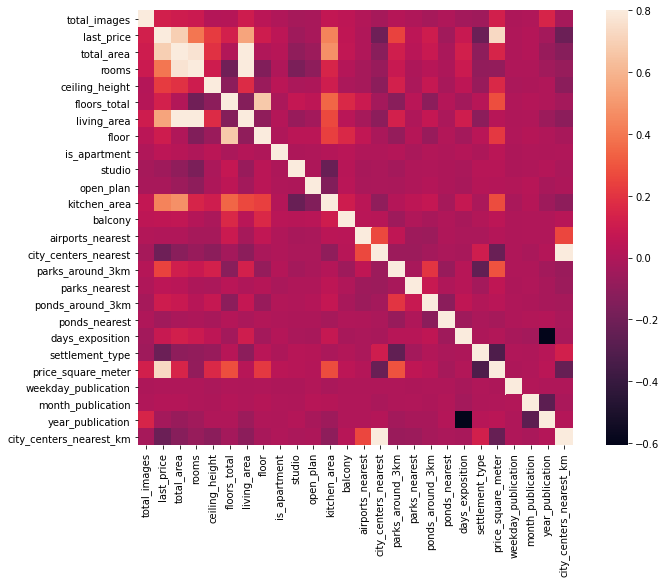

In [84]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

На графике корреляции можно увидеть зависимость величин. Рассмотрим полную стоимость объекта. 

Корреляция Пирсона составляет: 0.6918815670553792


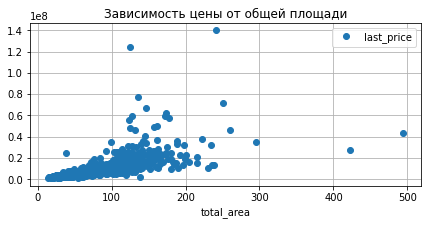

In [85]:
data_total_area_pivot = data.pivot_table(index='total_area', values='last_price', aggfunc='median')
data_total_area_pivot.plot(grid=True, style='o', figsize=(7, 3), title='Зависимость цены от общей площади')
print(f"Корреляция Пирсона составляет: {data['total_area'].corr(data['last_price'])}")

    По данному графику можно сделать вывод о том, что с увеличением общей площади квартиры растет и цена.

Корреляция Пирсона составляет: 0.5465792643633225


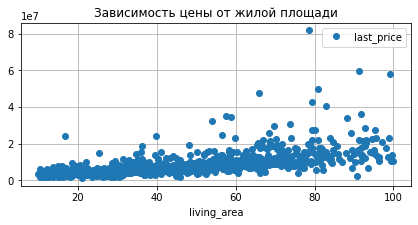

In [86]:
data_living_area_pivot = data.pivot_table(index='living_area', values='last_price', aggfunc='median')
data_living_area_pivot.plot(grid=True, style='o', figsize=(7, 3), title='Зависимость цены от жилой площади')
print(f"Корреляция Пирсона составляет: {data['living_area'].corr(data['last_price'])}")

    По данному графику можно так же сделать вывод о том, что с увеличением жилой площади квартиры растет и цена, однако взаимосвязь не такая высокая.

Корреляция Пирсона составляет: 0.43606870936626074


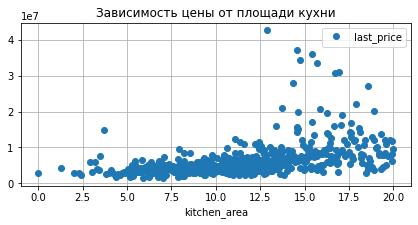

In [87]:
data_kitchen_area_pivot = data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
data_kitchen_area_pivot.plot(grid=True, style='o', figsize=(7, 3), title='Зависимость цены от площади кухни')
print(f"Корреляция Пирсона составляет: {data['kitchen_area'].corr(data['last_price'])}")

Зависимость цены от площади кухни слабее, чем от общей и жилой площади, но тем не менее, зависимость присутствует.

Корреляция Пирсона составляет: 0.3978579691702622


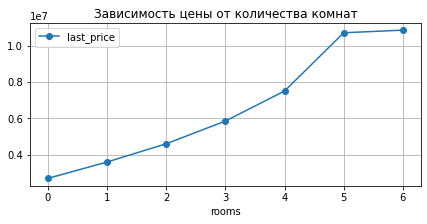

In [88]:
data_rooms_pivot = data.pivot_table(index='rooms', values='last_price', aggfunc='median')
data_rooms_pivot.plot(grid=True, style='o-', figsize=(7, 3), title='Зависимость цены от количества комнат')
print(f"Корреляция Пирсона составляет: {data['rooms'].corr(data['last_price'])}")

    Зависимость цены от количества комнат слабая, но видно, что с увеличением количества комнат растет и цена.

<AxesSubplot:title={'center':'Зависимость цены от этажа'}, xlabel='type_floor'>

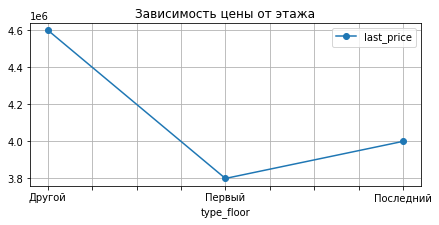

In [89]:
data_floor_pivot = data.pivot_table(index='type_floor', values='last_price', aggfunc='median')
data_floor_pivot.plot(grid=True, style='o-', figsize=(7, 3), title='Зависимость цены от этажа')

    Цена зависит от того, на каком этаже находится квартира. На первом этаже находятся квартиры подешевле, на втором этаже чуть подороже, но самые дорогие не на первом и не на последнем.

<AxesSubplot:title={'center':'Зависимость цены от дня публикации'}, xlabel='weekday_publication'>

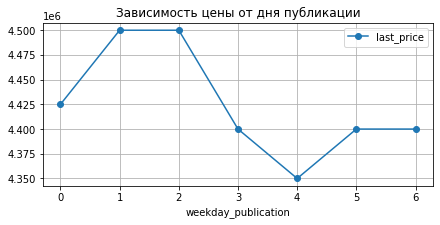

In [90]:
data_day_pivot = data.pivot_table(index='weekday_publication', values='last_price', aggfunc='median')
data_day_pivot.plot(grid=True, style='o-', figsize=(7, 3), title='Зависимость цены от дня публикации')

    На данном графике видно, что самые дорогие квартиры выставлены во вторник и в среду, дешевле всего в пятницу. Интересный фактор :)

<AxesSubplot:title={'center':'Зависимость цены от месяца публикации'}, xlabel='month_publication'>

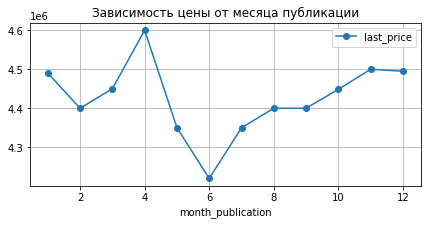

In [91]:
data_month_pivot = data.pivot_table(index='month_publication', values='last_price', aggfunc='median')
data_month_pivot.plot(grid=True, style='o-', figsize=(7, 3), title='Зависимость цены от месяца публикации')

    Объявления с более дорогими квартирами были размещены в апреле месяце, в июне дешевле всего. Может быть в июне люди хотят быстрее переехать из холодного Питера, поэтому ценник падает?)

<AxesSubplot:title={'center':'Зависимость цены от года публикации'}, xlabel='year_publication'>

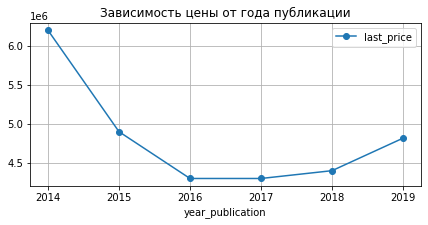

In [92]:
data_year_pivot = data.pivot_table(index='year_publication', values='last_price', aggfunc='median')
data_year_pivot.plot(grid=True, style='o-', figsize=(7, 3), title='Зависимость цены от года публикации')

    Пик дорогих квартир приходился в 2014 году, возможно из-за кризиса 2014-2015г., потом ценник начал падать и после 2017 года стал плавно повышаться, нужно понять почему. Рассмотрим площадь продаваемых квартир с каждым годом, т.к. по тепловой карте цена коррелирует с общей площадью квартир.

<AxesSubplot:title={'center':'Динамика площади продаваемых квартир'}, xlabel='year_publication'>

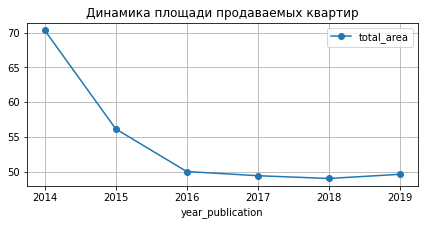

In [93]:
data_year_area_pivot = data.pivot_table(index='year_publication', values='total_area', aggfunc='median')
data_year_area_pivot.plot(grid=True, style='o-', figsize=(7, 3), title='Динамика площади продаваемых квартир')

    На графике видно, что с каждым годом площадь продаваемых квартир становится меньше. Т.е. с уменьшением площади квартир с каждым годом падала цена.

    Далее, посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [94]:
locality_top_10 = data['locality_name'].value_counts().head(10)
price_square_top_10 = data.query('locality_name in (@locality_top_10.index)').pivot_table(
    index='locality_name', 
    values='price_square_meter').astype(int)
price_square_top_10.sort_values('price_square_meter', ascending=False)

,price_square_meter
locality_name,
санкт-петербург,109180
пушкин,101593
деревня кудрово,95401
поселок парголово,90300
поселок мурино,85692
поселок шушары,78272
колпино,75384
гатчина,68557
всеволожск,68532


    Наибольшая средняя стоимость одного квадратного метра приходится в Санкт-Петербурга, минимальная в деревне Бор. В Пушкине очень много достопримечательностей, что в принципе средняя цена в ней оправдана, далее идут очень развивающиеся в постройке жилых домов районы, расположенные недалеко от Санкт-Петербурга.
    
    Далее, рассмотрим зависимость стоимости объектов от расстояния до центра города.

In [95]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
санкт-петербург,13394,5190000.0
поселок мурино,548,3452500.0
поселок шушары,429,3950000.0
деревня кудрово,429,3890000.0
всеволожск,379,3450000.0
пушкин,329,4990000.0
поселок парголово,320,4115000.0
колпино,319,3600000.0
деревня бор,307,3000000.0


<AxesSubplot:title={'center':'Средняя стоимость для каждого километра'}, xlabel='city_centers_nearest_km'>

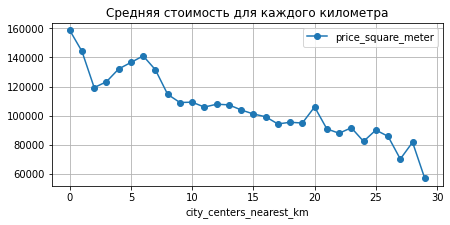

In [96]:
city_pivot_spb = data.query('locality_name == "санкт-петербург"').pivot_table(
    index = 'city_centers_nearest_km', 
    values = 'price_square_meter')
city_pivot_spb.plot(grid=True, style='o-', figsize=(7, 3), title = 'Средняя стоимость для каждого километра')

    На данном графике можно увидеть до 6 км. ценник достаточно высокий, после 6 км. начинается спад, затем возрастает в 20 км от центра, далее идет на снижение. График с колебаниями, не монотонный. 

    В данном пункте провели исследование факторов, больше всего влияющие на общую (полную) стоимость объекта, построены к ним графики и сделаны выводы. 

### Общий вывод

    Было проведено исследование рыночной стоимости недвижимости в г. Санкт-Петербурге и соседних населённых пунктов. Входные данные от Яндекс.Недвижимость - архив объявлений о продаже квартир за 2017-2019гг. Результаты исследования будут учтены при построении автоматизированной системы, которая будет отслеживать аномалии и мошенническую деятельность.
    
    В данном датасете были поставлены следующие цели:
    
    1) Использование Pandas для обработки данных;
    2) Использование MatplotLib и Seaborn для построения графиков;
    3) Поиск и понимание корреляций между переменными набора данных.
    
    Данных в датасете до очистки данных составило 23 699 строк, после обработки - 20 939 строк, в 14 колонках наблюдалось очень много пропусков. Те, которые можно было восстановить - восстановили медианой или с помощью новых "фич", более аномальные данные были удалены. 
    
    В ходе исследования были поставлены следующие гипотезы:
    
    Гипотеза 1. Цена зависит от общей площади квартиры. 
    
        Общая площадь большинства квартир в объявлении варьируются от 45 до 50 кв. метров, далее до 100 кв.метров объявлений плавно снижается. Корреляция по Пирсону составила 0.69 и это говорит о том, что с увеличением площади стоимость квартир увеличивается. 
        
    Гипотеза 2. Цена зависит от жилой площади квартиры.
    
        В основном, жилая площадь составляет в большинстве случаев 17-20 кв. метров, а для более больших квартир от 40 до 50 кв. Корреляция по Пирсону составила 0.55, что тоже говорит о том, что с увеличением жилой площади увеличивается стоимость квартир, однако, данная зависимость слабее, чем с общей площадью. 
        
    Гипотеза 3. Цена зависит от площади кухни.
    
        В основном общая площадь кухни в объявлениях составляет от 8 до 10 кв. метров. Корреляция по Пирсону составляет: 0.44, что говорит о небольшой зависимости.
        
    Гипотеза 4. Цена зависит от количества комнат.
    
        Максимальное количество объявлении с 1, 2 и 3 комнатами. Корреляция по Пирсону составила: 0.40, что говорит о небольшой зависимости от цены. 
        
    Гипотеза 5. Цена зависит от этажа квартиры. 
    
        В основном этажность домов составляют 5 и 9 этажей, большинство квартир расположены с 1 по 5 этаж, меньше всего объявлении приходятся, где расположение квартир находится на первом и последнем. 
        На первом этаже находятся квартиры подешевле, на втором этаже чуть подороже, но самые дорогие не на первом и не на последнем. Это говорит о том, что этаж, где расположена квартира, влияет на цену.
        
    Гипотеза 6. Цена зависит от даты размещения публикации. 
    
        День публикации имеет зависимость от цены. По графику зависимости дороже выставляются квартиры во вторник и в среду, а дешевле - в пятницу. Очень интересный фактор. 
        
        Месяц публикации тоже зависит от цены. Объявления с более дорогими квартирами были размещены в апреле месяце, в июне дешевле всего. 
        
        Год публикации зависит от цены. Объявления с дорогими квартирами приходился в 2014 году, возможно из-за кризиса 2014-2015г., потом ценник начал падать в связи с уменьшением площади квартир. 
        
     Гипотеза 7. Цена зависит от локации и расстояния от центра города. 
     
         Высокая средняя цена квартиры приходится на Санкт-Петербург и близко находящиеся районы. Высокие цены наблюдаются до 6 км. от центра, однако г. Пушкин находится около 26 км. от центра города и стоит на 2-м месте по цене после Санкт-Петербурга. Это неудивительно, т.к. г. Пушкин является одним из достропримечательных и экологичных городов рядом с Санкт-Петербургом.
         
         
     Подводя итог, были вынесены следующие рекомендации:
     
     1. Специалисты, занимающиеся разработкой Я.Недвижимость, должны включить в базу данных серии домов, которые находятся в открытом доступе. Тогда пропусков типа "высота потолков" не будет. Так же, там есть более дополнительна информация, например, год постройки дома, ширина стен и т.д.
     
     2. Важно так же добавить через Карты на каком расстоянии находится метро, электрички и т.д. Что так же может значительно влиять на цену. Так же, через карты можно добавить расстояние до ближайшего водоема или парка. 